# Getting started

`uravu` enables the use of powerful Bayesian modelling in Python, building on the capabilities of `emcee` and `dynesty`, for the understanding of some data. 
To show how this can be used, we will create some synthetic data using `numpy`.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from uravu.relationship import Relationship
from uravu import plotting

In [2]:
np.random.seed(1)

In [3]:
x = np.linspace(0, 9, 10)
y = np.linspace(0, 18, 10) + 2
y += y * np.random.randn((10)) * 0.025
y_err = np.ones((10))

Plotting this data, shows it appears to be a straight line relationship, with some gradient and intercept.

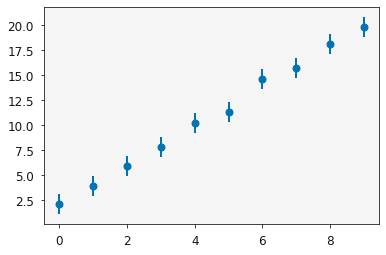

In [4]:
plt.errorbar(x, y, y_err, marker='o', ls='')
plt.show()

Let's use `uravu` to model a straight line function for the data, for more information about the requirements of the input function check out the [Inupt functions](./input_functions.html) tutorial. 

In [5]:
def straight_line(x, m, c):
    """
    A straight line.
    
    Args:
        x (array_like): Abscissa data.
        m (float): Gradient.
        c (float): Intercept.
    
    Returns:
        (array_like): Ordinate data.
    """
    return m * x + c

The function, x data, y data, and y error can then be brought together in the `Relationship` class.

In [6]:
modeller = Relationship(straight_line, x, y, ordinate_error=y_err)

The `Relationship` class enables substantial functionality and is at the core of `uravu`, you can learn about this functionality in the [tutorials](./tutorials.html). 
Quickly, we will show the maximisation of the likelihood (there is more about this in the [first tutorial](max_likelihood.html)).

In [7]:
modeller.max_likelihood('mini')

The string `'mini'` indicates that the standard [scipy.optimize.minimize()](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.minimize.html) function should be used.

The built in `plotting` library can be used to make publication quality plot of the `Relationship`.

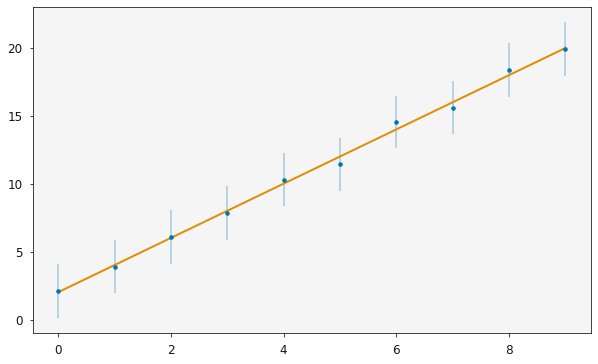

In [8]:
fig, ax = plt.subplots(figsize=(10, 6))
ax = plotting.plot_relationship(modeller, axes=ax)
plt.show()

We hope you enjoy using `uravu`, feel free to contribute on [Github](https://github.com/arm61/uravu), and tell your friends and colleagues!